In [1]:
# !pip install sounddevice

In [2]:
import sounddevice as sd
from scipy.io.wavfile import write
from scipy.io.wavfile import read
from scipy.linalg import toeplitz, solve_toeplitz
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os


In [3]:
fs = 16000  # Sample rate
seconds = 2  # Duration of recording

# Recording Audio Signal

Uncomment code below to record Audio and rename filename

In [4]:
# myrecording = sd.rec(int(seconds*fs), samplerate=fs, channels=1)
# sd.wait()  # Wait until recording is finished
# write('yes4.wav',fs, myrecording) # Save as WAV file 

In [5]:
!pip install pydub

In [6]:
# # Import packages
# from pydub import AudioSegment
# from pydub.playback import play

# # Play
# playaudio = AudioSegment.from_file('yes2.wav', format='wav')
# play(playaudio)

# Plot Audio Signal & Listen to Audio

In [7]:
def plotting_signal(data, fs):
    # Duration of the audio in Seconds
    duration = len(data)/fs
    print("Duration of Audio in Seconds", duration)
    print("Duration of Audio in Minutes", duration/60)
    time = np.arange(0,duration,1/fs)

    # Plotting the Graph using Matplotlib
    plt.plot(time,data)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('Signal')
    plt.show()

Duration of Audio in Seconds 2.0
Duration of Audio in Minutes 0.03333333333333333


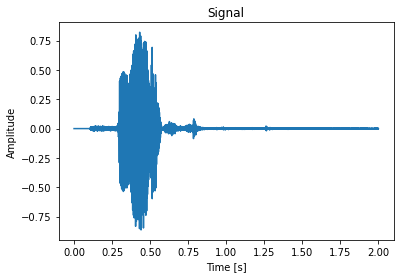

In [8]:
#  Read the Audiofile
fs, data_y = read('yes1.wav')
sd.play(data_y, fs)
# # Frame rate for the Audio
# # print(fs)
# print(len(data_y))

plotting_signal(data_y, fs)

Duration of Audio in Seconds 2.0
Duration of Audio in Minutes 0.03333333333333333


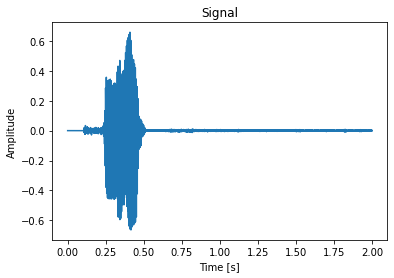

In [9]:
fs, data_n = read('no1.wav')
sd.play(data_n, fs)

# # Frame rate for the Audio
# # print(fs)
# print(len(data_n))

plotting_signal(data_n, fs)

#  Creating frames (with windowing) from signal and then creating Toeplitz matrix

In [10]:
import os
def windowing_and_Toeplitz_Matrix(p, data):
#     if not os.path.isdir('splitaudio'):
#         os.mkdir('splitaudio')

    # fs, data = read('yes3.wav')
    length_of_audio = len(data)

    print('\nLength of Audio File: ', length_of_audio)
    start = 0
    frame = 240
    end = 0
    counter = 0

    sums = []
    toeplitz_rnm = []

    while end < length_of_audio:
        end = start + frame
        if end > length_of_audio:
            end = length_of_audio
    #     print(start, end)
        chunk = data[start:end]
        # chunk is an n-D array containing 240 cols(frame size) 
    #     print(chunk.tolist()) # convert each row in the form of comma separated list
    #     print(chunk[0]) # this print first element of any chunk/window

#         filename = f'splitaudio/chunk{counter}.wav'
        # Get Sum of 'Square of every element' of Window/Chunk
        sums.insert(counter, np.sum(np.square(chunk)))
        # Uncomments code below to show Plot of sum of Squares
#         plot_Sum_of_squares(sums)
        # Toeplitz Matrix
        rnm = []
        for i in range(0, p+1):
            summation = 0
            j = 0
            while end != 32000 and j+i < 240:
                summation = summation + chunk[j]*chunk[j+i]
                j+=1
            if end == 32000 and j+i < 160:
                summation = summation + chunk[j]*chunk[j+i]
                j+=1
            rnm.insert(i, summation)
    #     print(len(rnm))
        counter += 1
        start = end - frame//3
        toeplitz_rnm.append(rnm)

    print('\nNo. of Frames Generated : ',len(toeplitz_rnm))
    print('\n************** Toeplitz Matrix of First Window/Frame **************\n')
    print(toeplitz(np.array(toeplitz_rnm[0])[:-1]))
    
    return toeplitz_rnm

Plot for **Sum of Squares** of every frame

In [11]:
def plot_Sum_of_squares(sums):
    duration = len(sums)/fs
    print("Duration of Audio in Seconds", duration)
    print("Duration of Audio in Minutes", duration/60)
    t = np.arange(0,duration,1/fs)

    print('No. of Frames: ',len(sums))
    # print('Sum of Squares:',sums)
    # print('Frame {}- Sum of Square: {}'.format(0, sums[0]))

    # Plotting the Graph using Matplotlib
    plt.plot(sums)
    # plt.xlabel('Time [s]')
    plt.ylabel('Sum of Square of frame')
    plt.title('new1.wav')
    plt.show()

In [12]:
p = 12
toeplitz_matrix = []
toeplitz_matrix.append(windowing_and_Toeplitz_Matrix(p, data_y))
toeplitz_matrix.append(windowing_and_Toeplitz_Matrix(p, data_n))


Length of Audio File:  32000

No. of Frames Generated :  200

************** Toeplitz Matrix of First Window/Frame **************

[[ 4.37721610e-08  9.31322575e-10  2.79396772e-09  2.79396772e-09
   9.31322575e-10  4.65661287e-09  2.79396772e-09  4.65661287e-09
   2.79396772e-09 -1.86264515e-09 -1.86264515e-09 -9.31322575e-10]
 [ 9.31322575e-10  4.37721610e-08  9.31322575e-10  2.79396772e-09
   2.79396772e-09  9.31322575e-10  4.65661287e-09  2.79396772e-09
   4.65661287e-09  2.79396772e-09 -1.86264515e-09 -1.86264515e-09]
 [ 2.79396772e-09  9.31322575e-10  4.37721610e-08  9.31322575e-10
   2.79396772e-09  2.79396772e-09  9.31322575e-10  4.65661287e-09
   2.79396772e-09  4.65661287e-09  2.79396772e-09 -1.86264515e-09]
 [ 2.79396772e-09  2.79396772e-09  9.31322575e-10  4.37721610e-08
   9.31322575e-10  2.79396772e-09  2.79396772e-09  9.31322575e-10
   4.65661287e-09  2.79396772e-09  4.65661287e-09  2.79396772e-09]
 [ 9.31322575e-10  2.79396772e-09  2.79396772e-09  9.31322575e-10
   4.3

In [13]:
# this len(chunk) print  individual length of every chunk while doing in loop

# on printing this here, it is giving the length of last chunk which is 160 in size while rest of windows/chunks are of size 240
# print(len(chunk))

# toeplitz_matrix

In [14]:
#  np.where(np.array(sums) > 0.1 , sums, 0)

# Solving the Toeplitz matrix using Durbin's algorithm

In [15]:
def Find_predictive_coeeficients(i):
    toeplitz_matrix = toeplitz(np.array(i)[:12],np.array(i)[:12])
    vector = np.array(i)[1:]
#     vector_b = vector.transpose()
    print('T:',toeplitz_matrix[0])
    print('b:',vector)
    ai = solve_toeplitz((toeplitz_matrix[0],toeplitz_matrix[0]), vector)
#     print(round(ai[0],6))
    # Verification using Numpy system of linear scalar equations.
#     az = np.linalg.solve(toeplitz_matrix, vector)
#     print(az)
    return ai


#  Finding Cepstral coefficients from LPC coefficients 
(and applying the "raised sine window") > not done yet

c0 = log(sigma)**2

cm = am + (from k = 1 to m-1)[sum(k/m*ck*am-k)], where 1<= m<=p

cm = (from k = 1 to m-1)[sum(k/m*ck*am-k)], where m>p

In [16]:
def find_cepstral_coefficients(a_i):
    ceps_coeff = []
    c0 = np.var(a_i)
    ceps_coeff.insert(0, c0)
    for m in range(1, p+1):
        sum = a_i[m-1]
#         print('ai:',ai[m-1])
        for k in range(1, m):
            if k>=0 and m-k > 0 :
                sum += 1/m*ceps_coeff[k]*a_i[m-k-1]
        ceps_coeff.insert(m, sum)
#         print(ceps_coeff)
    return ceps_coeff


In [17]:
all_cepstral_coeff = []
for x in range(2):
    for i in toeplitz_matrix[x]:
        a_i = Find_predictive_coeeficients(i)
        print('*********Predictive Coefficients:*********\n',a_i)
        Cepstral_coefficient = find_cepstral_coefficients(a_i)
        print('*********Cepstral Coefficients (c0 to c12) for Frame {}*********\n{}'.format(toeplitz_matrix[x].index(i)+1,Cepstral_coefficient))
        all_cepstral_coeff.append(Cepstral_coefficient)

T: [ 4.37721610e-08  9.31322575e-10  2.79396772e-09  2.79396772e-09
  9.31322575e-10  4.65661287e-09  2.79396772e-09  4.65661287e-09
  2.79396772e-09 -1.86264515e-09 -1.86264515e-09 -9.31322575e-10]
b: [ 9.31322575e-10  2.79396772e-09  2.79396772e-09  9.31322575e-10
  4.65661287e-09  2.79396772e-09  4.65661287e-09  2.79396772e-09
 -1.86264515e-09 -1.86264515e-09 -9.31322575e-10  3.72529030e-09]
*********Predictive Coefficients:*********
 [-0.00296026  0.05514578  0.06386361  0.01534924  0.09230301  0.05596578
  0.09224561  0.04918783 -0.06717275 -0.07656345 -0.03738889  0.07484638]
*********Cepstral Coefficients (c0 to c12) for Frame 1*********
[0.0032549448083937587, -0.0029602612518339535, 0.055150162191634315, 0.0637547726057586, 0.01601511725659782, 0.09369202072276396, 0.05684090013504273, 0.09394913156503468, 0.05141082661865181, -0.0649410868438248, -0.07373977831367451, -0.03620817238075603, 0.07531067202856401]
T: [ 5.58793545e-08 -4.65661287e-09  3.72529030e-09  0.00000000e+0

[0.22814605419891332, -1.3542271589669361, 0.2998961153632539, 0.34182848232814234, -0.15929645087456293, 0.061402144267545374, 0.2794766897562006, 0.11954085444054391, -0.22722486836076253, 0.27182426931662873, 0.3879034979195377, 0.19034263178388147, 8.08386446099485e-06]
T: [ 0.03706995 -0.02807359  0.01144019  0.00332693 -0.01178509  0.0115585
 -0.0086582   0.00951074 -0.01369416  0.01760915 -0.01620161  0.00768827]
b: [-0.02807359  0.01144019  0.00332693 -0.01178509  0.0115585  -0.0086582
  0.00951074 -0.01369416  0.01760915 -0.01620161  0.00768827  0.00333235]
*********Predictive Coefficients:*********
 [-1.06210724 -0.56544967 -0.13761109 -0.48470794 -0.25539078  0.01097421
  0.14250164 -0.14126454  0.12897459 -0.03791993 -0.09999065 -0.14750095]
*********Cepstral Coefficients (c0 to c12) for Frame 67*********
[0.10601115543970585, -1.0621072362838648, -0.0014137753598156833, 0.06307883422655602, -0.46471777209503184, -0.06080706493097578, 0.10941011951787084, 0.1339671858293663

  0.00268992  0.00110594 -0.00049276 -0.0019918  -0.00332572 -0.0044328 ]
*********Predictive Coefficients:*********
 [ 1.39993575 -0.50347848  0.37247044 -0.49757775  0.36821976 -0.38198909
  0.30018293  0.01729004 -0.17794826 -0.03222501 -0.06940627  0.11786327]
*********Cepstral Coefficients (c0 to c12) for Frame 126*********
[0.24611969291304334, 1.39993575353938, 0.47643157882572895, 0.3598491331072047, -0.301245918286252, 0.1438154726534926, -0.25441264527821084, 0.14601776326725932, 0.13062950867998077, -0.1932955970845281, -0.04424729659025001, -0.10134614567127231, 0.0975102943571561]
T: [ 1.43105825e-02  1.40115255e-02  1.33082680e-02  1.22882668e-02
  1.09759318e-02  9.45596583e-03  7.76102301e-03  5.95295336e-03
  4.03040554e-03  2.02802196e-03  5.55599108e-05 -1.79976970e-03]
b: [ 1.40115255e-02  1.33082680e-02  1.22882668e-02  1.09759318e-02
  9.45596583e-03  7.76102301e-03  5.95295336e-03  4.03040554e-03
  2.02802196e-03  5.55599108e-05 -1.79976970e-03 -3.47333681e-03]
*

 [ 1.16402588 -0.30332153  0.15259369 -0.20146394  0.15299457 -0.01848082
 -0.04446502 -0.04692173  0.15021881 -0.04955366  0.02614069 -0.02434339]
*********Cepstral Coefficients (c0 to c12) for Frame 186*********
[0.12405577371111719, 1.1640258764933158, 0.3741565880515374, 0.1800783074209536, -0.13302667374924287, 0.07561788864004915, 0.024612585328509427, -0.04662693043675253, -0.05373719580062547, 0.13301631910793746, -0.017315311472262, 0.020599663274284738, -0.01646139533995467]
T: [0.00039876 0.00036971 0.00032516 0.00028348 0.00023618 0.00019169
 0.00015755 0.0001344  0.00012016 0.00011764 0.00012587 0.00013632]
b: [0.00036971 0.00032516 0.00028348 0.00023618 0.00019169 0.00015755
 0.0001344  0.00012016 0.00011764 0.00012587 0.00013632 0.00014085]
*********Predictive Coefficients:*********
 [ 1.24312698 -0.48742925  0.39987033 -0.32906194  0.10058995 -0.10721964
  0.10207217 -0.12405477  0.06874329  0.03219465  0.12663478 -0.09636125]
*********Cepstral Coefficients (c0 to c12) 

T: [0.44976976 0.44599767 0.44019288 0.43246826 0.42283862 0.41143443
 0.39827564 0.38358905 0.36739159 0.34969524 0.33068554 0.31036974]
b: [0.44599767 0.44019288 0.43246826 0.42283862 0.41143443 0.39827564
 0.38358905 0.36739159 0.34969524 0.33068554 0.31036974 0.28892258]
*********Predictive Coefficients:*********
 [ 1.08557226 -0.01919526  0.00150125 -0.01718167  0.00481217 -0.03233038
  0.01125629  0.01146126 -0.01850578  0.01594575 -0.01379656 -0.06043309]
*********Cepstral Coefficients (c0 to c12) for Frame 49*********
[0.09221957156614123, 1.085572263230549, 0.5700383142860129, 0.20082789438311033, 0.034993551865913075, 0.008079549012610482, -0.03169197349394598, 0.0012118788756358499, 0.010972657826718456, -0.015812881817446094, 0.013023924797501255, -0.011661943470784995, -0.06220005567677011]
T: [0.13936319 0.13838022 0.13692888 0.13498723 0.13252285 0.1296187
 0.12624582 0.12241967 0.11820063 0.11355876 0.10851399 0.10312895]
b: [0.13838022 0.13692888 0.13498723 0.13252285 

  0.21110959 -0.1647154   0.16089351 -0.10213649 -0.00427416  0.00535716]
*********Cepstral Coefficients (c0 to c12) for Frame 102*********
[0.1159620436150332, 0.9187552118789682, 0.056399120993302965, 0.3474041276767617, -0.11564790308556487, 0.16946319229750842, -0.06149559143325064, 0.1538082962653179, -0.09602765081888248, 0.11133713491847091, -0.05230140631363245, -0.03932367116666971, 0.022999419121207853]
T: [0.00151614 0.00136418 0.00121104 0.00113062 0.00105586 0.001034
 0.00102273 0.00100812 0.00096291 0.00090925 0.00086636 0.0008233 ]
b: [0.00136418 0.00121104 0.00113062 0.00105586 0.001034   0.00102273
 0.00100812 0.00096291 0.00090925 0.00086636 0.0008233  0.00079026]
*********Predictive Coefficients:*********
 [ 0.97299511 -0.32085845  0.30882189 -0.27952378  0.25949811 -0.10866321
  0.20459355 -0.13385266  0.05247659 -0.0244769   0.01376609 -0.00898645]
*********Cepstral Coefficients (c0 to c12) for Frame 103*********
[0.10772867430491218, 0.9729951056078033, 0.15250129

 0.00111837 0.0009232  0.00072099 0.00051577 0.00030895 0.0001423 ]
*********Predictive Coefficients:*********
 [ 1.13287677 -0.20220719  0.15469851 -0.11270925  0.16625301 -0.29713455
  0.06669562  0.08662105 -0.02011453  0.02722117 -0.21141311  0.12602058]
*********Cepstral Coefficients (c0 to c12) for Frame 151*********
[0.12337421433944178, 1.1328767742223573, 0.43949770588929993, 0.24430548575477187, -0.021921055199265196, 0.13946696523536592, -0.2406289045843227, -0.018344352730116822, 0.09130924266622388, -0.008401768244316014, 0.032979033809771206, -0.2100035401545951, 0.09162299870855874]
T: [0.00307739 0.00301061 0.00293823 0.00288045 0.00282601 0.00277433
 0.00270066 0.00263297 0.00256857 0.00249322 0.00240167 0.00229956]
b: [0.00301061 0.00293823 0.00288045 0.00282601 0.00277433 0.00270066
 0.00263297 0.00256857 0.00249322 0.00240167 0.00229956 0.00221276]
*********Predictive Coefficients:*********
 [ 1.02950344 -0.15441589  0.11303643 -0.06301418  0.21968874 -0.20266568
  

In [18]:
print('Cepstral Coeff. Elements in each frame:',len(all_cepstral_coeff[0]))

print('Total Cepstral Coeff. vectors:',len(all_cepstral_coeff))

Cepstral Coeff. Elements in each frame: 13
Total Cepstral Coeff. vectors: 400


#  Creation of codebook using LBG/Binary Split algorithm

Wall time: 143 ms
Codebook: [[0.2098618719893319, 1.0929931604720506, 0.1585278209663382, 0.21724266486338203, -0.11470897628806435, 0.13276773331859584, -0.06546765725673644, 0.09954131371037737, -0.07387521620053336, 0.09894113983347781, -0.057617455163106644, 0.011000889815234997, -0.015544294240107715], [0.18942935134794214, -0.29230365148961907, 0.2325203826486543, 0.22245327568701279, -0.05614935417099861, -0.05061374157157822, -0.07469439333859734, -0.007668849611733128, -0.17086929506260068, 0.009242568156182955, 0.06882138726409075, -0.057374362851938296, 0.04781761023571599]]
Codebook Abstract Weights: [364, 36]
Codebook Relative Weights: [0.91, 0.09]


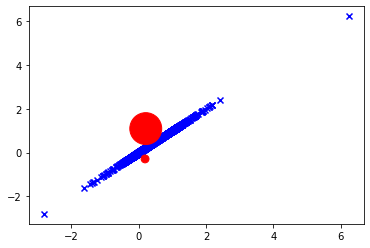

In [19]:
import matplotlib.pyplot as plt

import random
import lbg

%matplotlib inline

# population size
SIZE_CODEBOOK = 2

population = all_cepstral_coeff
# print(population)


# display population as blue crosses
plt.scatter([p for p in population], [p for p in population], marker='x', color='blue')
# plt.show()
# generate codebook
%time cb, cb_abs_w, cb_rel_w = lbg.generate_codebook(population, SIZE_CODEBOOK)

print('Codebook:',cb)
print('Codebook Abstract Weights:', cb_abs_w)
print('Codebook Relative Weights:', cb_rel_w)

# display codebook as red filled circles
# codevectors with higher weight (more points near them) get bigger radius
plt.scatter([p[0] for p in cb], [p[1] for p in cb], s=[((w+1) ** 5) * 40 for w in cb_rel_w], marker='o', color='red')

plt.show()

# Implementation of distance measures (Tokhura distance)

In [20]:
weights = [1, 3, 7, 13, 19, 22, 25, 33, 42, 52, 56, 61]
cepstral_random = random.choice(all_cepstral_coeff)
print('Random Cepstral Coefficients:', cepstral_random[1:])
for x in range(2):
    distance = 0
    for i in range(1, p+1):
        distance += weights[i-1]*(cepstral_random[i] - cb[x][i])**2
        
    print('\nDistance from {}th Codebook Vector: {}'.format(x+1, distance))

Random Cepstral Coefficients: [1.33736155081933, 0.6295627064680893, -0.008024680756044622, -0.16295964064897436, 0.05523902151629104, 0.14798647762997935, 0.08477787720048745, 0.031728974043550254, -0.09897277483036424, -0.09097858039112278, 0.017865083914532814, -0.037656838049375786]

Distance from 1th Codebook Vector: 4.336351962240297

Distance from 2th Codebook Vector: 9.103257357037261
